In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import torch
from fastai import *
from fastai.basics import *
from fastai.callback.all import *
from fastai.metrics import error_rate, accuracy
from fastai.vision import *
from fastai.vision.all import *
from fastai.basics import *
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
path = untar_data(URLs.MNIST)

In [5]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [31]:
bs = 2560

In [32]:
fnames = get_image_files(path)
def label_func(x): return x.parent.name
data = ImageDataLoaders.from_path_func(path, fnames, label_func, valid = 'testing', bs = bs)

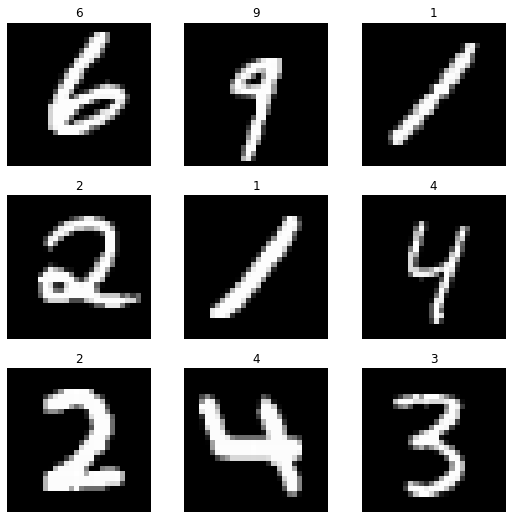

In [33]:
data.show_batch()

In [34]:
learn = cnn_learner(data, resnet152, metrics=accuracy)

In [35]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

SuggestedLRs(valley=0.0006918309954926372)

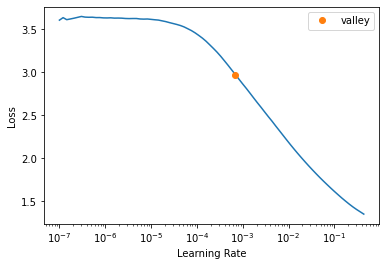

In [36]:
learn.lr_find()

In [37]:
learn.fit_one_cycle(10, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.822159,1.031443,0.676357,01:06
1,0.988788,0.490451,0.863143,01:05
2,0.588186,0.135498,0.957929,01:04
3,0.374409,0.097024,0.970714,01:04
4,0.246789,0.086566,0.974214,01:03
5,0.165817,0.084366,0.975429,01:02
6,0.112548,0.084756,0.976571,01:09
7,0.077608,0.085166,0.976857,01:05
8,0.054469,0.085542,0.976786,01:06
9,0.039062,0.085633,0.976857,01:03


In [38]:
learn.unfreeze()

In [39]:
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.102989,20124.279297,0.265357,01:07
1,0.065907,0.071977,0.987214,01:07
2,0.043230,0.029726,0.991714,01:08
3,0.028320,0.019682,0.994357,01:08
4,0.020065,0.018917,0.994643,01:07


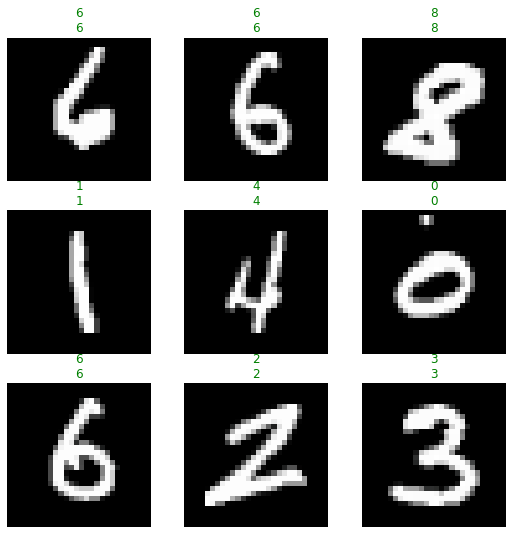

In [40]:
learn.show_results()

In [41]:
interp = Interpretation.from_learner(learn)

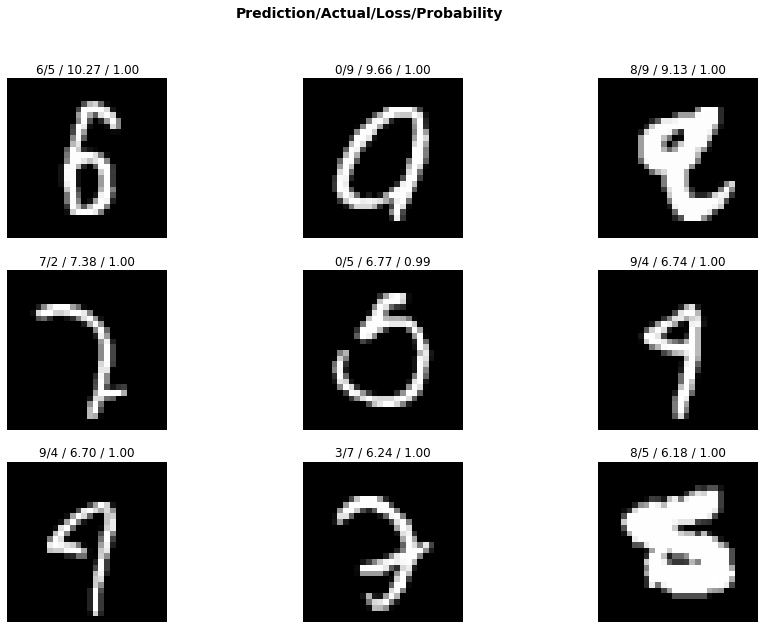

In [42]:
interp.plot_top_losses(9, figsize=(15,10))